In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt

RANDOM_STATE = 99

In [76]:
df = pd.read_csv('Data in Table S4 of the Supporting Information.csv')
data = df.values
X = data[:, :16]
Y = data[:, 16]
first_feature = data[:, 0]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=RANDOM_STATE)
train_index, test_index = next(sss.split(X, first_feature))

x_train, x_test = X[train_index], X[test_index]
y_train, y_test = Y[train_index], Y[test_index]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

params = {
    'n_estimators': 50,
    'learning_rate': 0.76,
    'loss': 'linear',
    'random_state': RANDOM_STATE
}

model = AdaBoostRegressor(**params)
model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"Metrics train:\n\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n\t R2: {r2_score(y_train, train_predictions):.4f}")
print(f"Metrics test:\n\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n\t R2: {r2_score(y_test, test_predictions):.4f}")

Metrics train:
	 MSR: 2.6906 
	 MAR: 1.3888 
	 R2: 0.8328
Metrics test:
	 MSR: 2.3063 
	 MAR: 1.1828 
	 R2: 0.7568


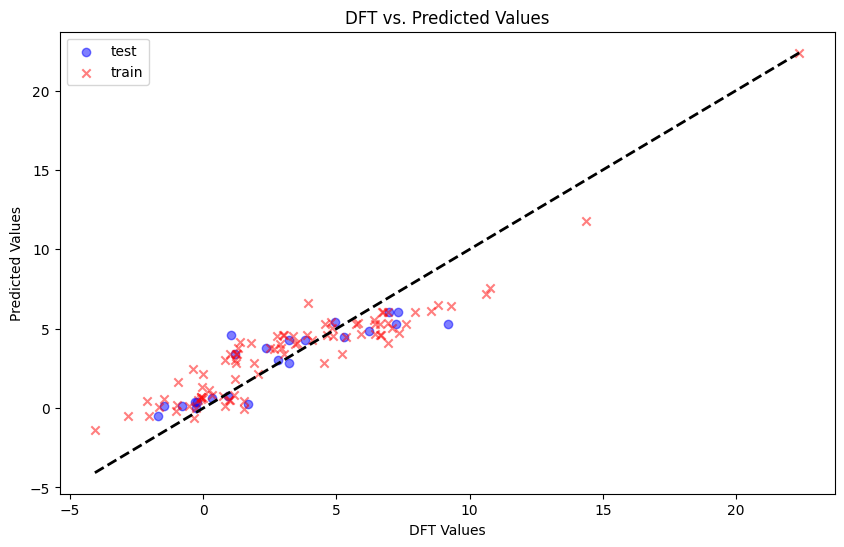

       feature  importance
9           C1    0.246419
8        radii    0.162946
5      neg(Nm)    0.123832
15          H2    0.096554
14          H1    0.088964
0       atom_N    0.055611
7          aff    0.042036
2    chemi_pot    0.039605
13          N3    0.033717
1   atom_wight    0.026446
6     i_en(Im)    0.021957
11          N1    0.021391
3         In_e    0.014923
12          N2    0.013794
10          C2    0.007224
4        out_e    0.004582


In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

importances = model.feature_importances_

feature_names = df.columns[:16]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

[-1.687  2.36   5.298  9.187  1.673 -1.463 -0.32   6.215  3.216  0.345
  1.052 -0.287  4.95   7.319  1.202  3.803 -0.795  6.958  2.805  3.217
  7.234 -0.22   0.936]
[-0.47975     3.76312     4.4817      5.28953333  0.286       0.13835135
  0.3948      4.85602564  2.86360714  0.643       4.58790909 -0.02006897
  5.42288889  6.02928571  3.408475    4.30390385  0.13835135  6.03541667
  3.03951515  4.30390385  5.28953333  0.37208333  0.756     ]
[ 6.7140e+00 -9.4000e-02  4.8690e+00  9.3140e+00  4.5460e+00  1.2410e+00
 -2.7500e-01  3.0280e+00  6.4380e+00 -1.3000e-02  8.0500e-01  2.7560e+00
  2.9920e+00 -2.1180e+00  3.5290e+00 -7.8000e-02  1.4386e+01 -4.0700e+00
 -2.7000e-02  1.5430e+00  7.6270e+00  6.6710e+00  1.5300e+00  4.8050e+00
  6.9520e+00 -5.4100e-01  6.4310e+00  5.2040e+00 -8.9000e-02  6.9400e+00
  7.0700e+00  4.5850e+00  3.9180e+00  4.8350e+00  1.0763e+01  8.5340e+00
  1.2340e+00  8.2300e-01  6.7370e+00  1.2910e+00  9.9500e-01  1.1860e+00
  3.0370e+00  3.1700e-01 -1.0400e+00  5.811

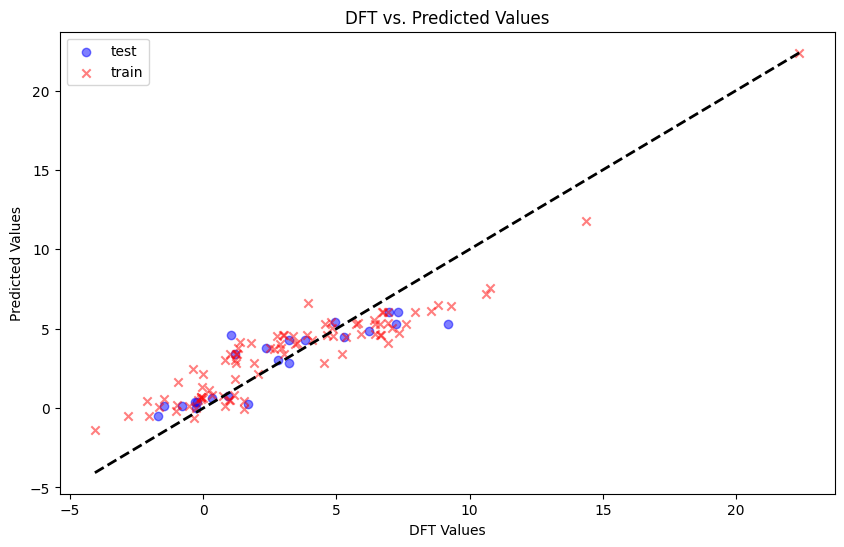

In [78]:
print(y_test)
y_predict_test = model.predict(x_test)
print(y_predict_test)

print(y_train)
y_predict_train = model.predict(x_train)
print(y_predict_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_test, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, y_predict_train, alpha=0.5, color='red', label='train', marker='x')

plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()